**Data Preprocessing**

In [1]:
# 1. IMPORTS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split


In [2]:
#from google.colab import drive
# 2. MOUNT DRIVE
#drive.mount('/content/drive')

In [3]:
TRAIN_DIR = '/content/drive/MyDrive/cvprFaceDataset/newdata/train'
TEST_DIR  = '/content/drive/MyDrive/cvprFaceDataset/newdata/test'

class_names = ['nadim', 'marowa', 'mehedi', 'bikash', 'unknown']
IMG_SIZE = 256


In [4]:

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

def load_faces(base_dir):
    X, y = [], []
    print("Loading faces...")

    for label, person in enumerate(class_names):
        person_dir = os.path.join(base_dir, person)
        if not os.path.isdir(person_dir):
            continue

        for img_name in os.listdir(person_dir):
            img = cv2.imread(os.path.join(person_dir, img_name))
            if img is None:
                continue

            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)

            if len(faces) == 0:
                continue

            x, y_, w, h = faces[0]
            face = img[y_:y_+h, x:x+w]
            face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))

            X.append(face)
            y.append(label)

    return np.array(X), np.array(y)

# Load datasets
X_train, Y_train = load_faces(TRAIN_DIR)
X_test,  Y_test  = load_faces(TEST_DIR)


Loading faces...
Loading faces...


In [5]:
print("\n--- DATASET SHAPES ---")
print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"X_test:  {X_test.shape},  Y_test:  {Y_test.shape}")


--- DATASET SHAPES ---
X_train: (981, 256, 256, 3), Y_train: (981,)
X_test:  (42, 256, 256, 3),  Y_test:  (42,)


Data Shuffled!


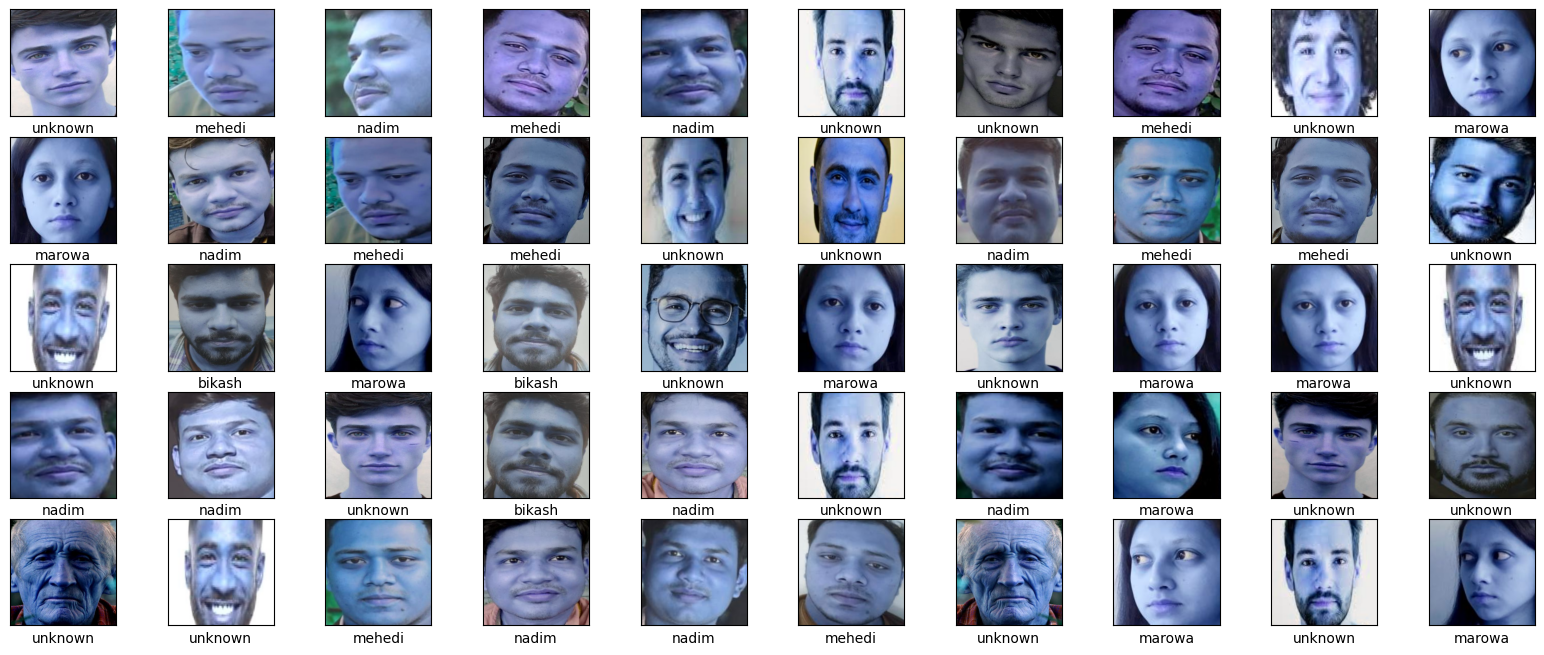

In [6]:

# 1. SHUFFLE THE DATA
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

print("Data Shuffled!")

# 2. PLOT images
plt.figure(figsize=(20,8))
limit = min(50, len(X_train))

for i in range(limit):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i]])
plt.show()

In [7]:
# Normalize data
X_train_normalize= X_train.astype('float32') / 255.0
X_test_normalize = X_test.astype('float32') / 255.0

In [8]:


model = keras.Sequential([
        ## input layer
    keras.Input(shape=(128, 128, 3)),
     ## hidden layers

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    ## output layer
    layers.Dense(5, activation='softmax')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455,493 (1.74 MB)

 Trainable params: 455,493 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
h = model.fit(x=X_train_normalize, y=Y_train, epochs=30, validation_split=0.2, batch_size=32)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 449ms/step - accuracy: 0.2609 - loss: 1.5502 - val_accuracy: 0.2792 - val_loss: 1.5401
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.2710 - loss: 1.5121 - val_accuracy: 0.2792 - val_loss: 1.4736
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.3157 - loss: 1.4418 - val_accuracy: 0.2893 - val_loss: 1.4199
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.3834 - loss: 1.3801 - val_accuracy: 0.4162 - val_loss: 1.2955
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.4990 - loss: 1.2322 - val_accuracy: 0.3655 - val_loss: 1.3384
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.4756 - loss: 1.1741 - val_accuracy: 0.5838 - val_loss: 1.0349
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.6236 - loss: 0.9649 - val_accuracy: 0.5990 - val_loss: 0.9697
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.6563 - loss: 0.8430 - val_accuracy: 0.6650 -

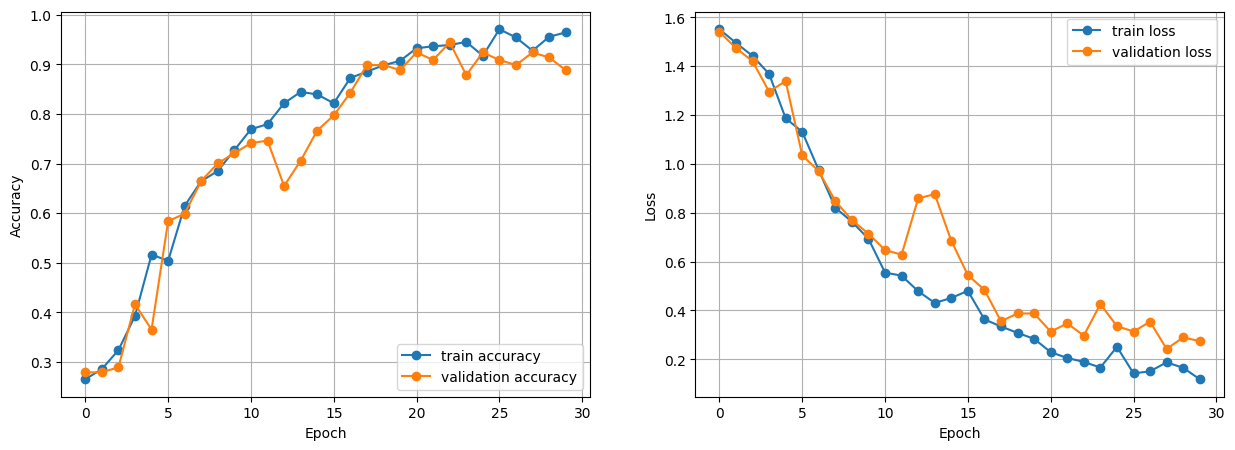

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test_normalize, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9211 - loss: 0.1638

Test Accuracy: 0.9285714030265808

Test Loss: 0.1484677493572235


In [13]:
predictions = model.predict(X_test_normalize)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step


In [14]:
predictions[1]

array([2.0331986e-01, 5.4737113e-02, 7.5383461e-04, 1.1187644e-07,
       7.4118912e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

np.int64(0)

In [16]:
model.save("face_attendance_model.keras")
print("Model saved!")

Model saved!


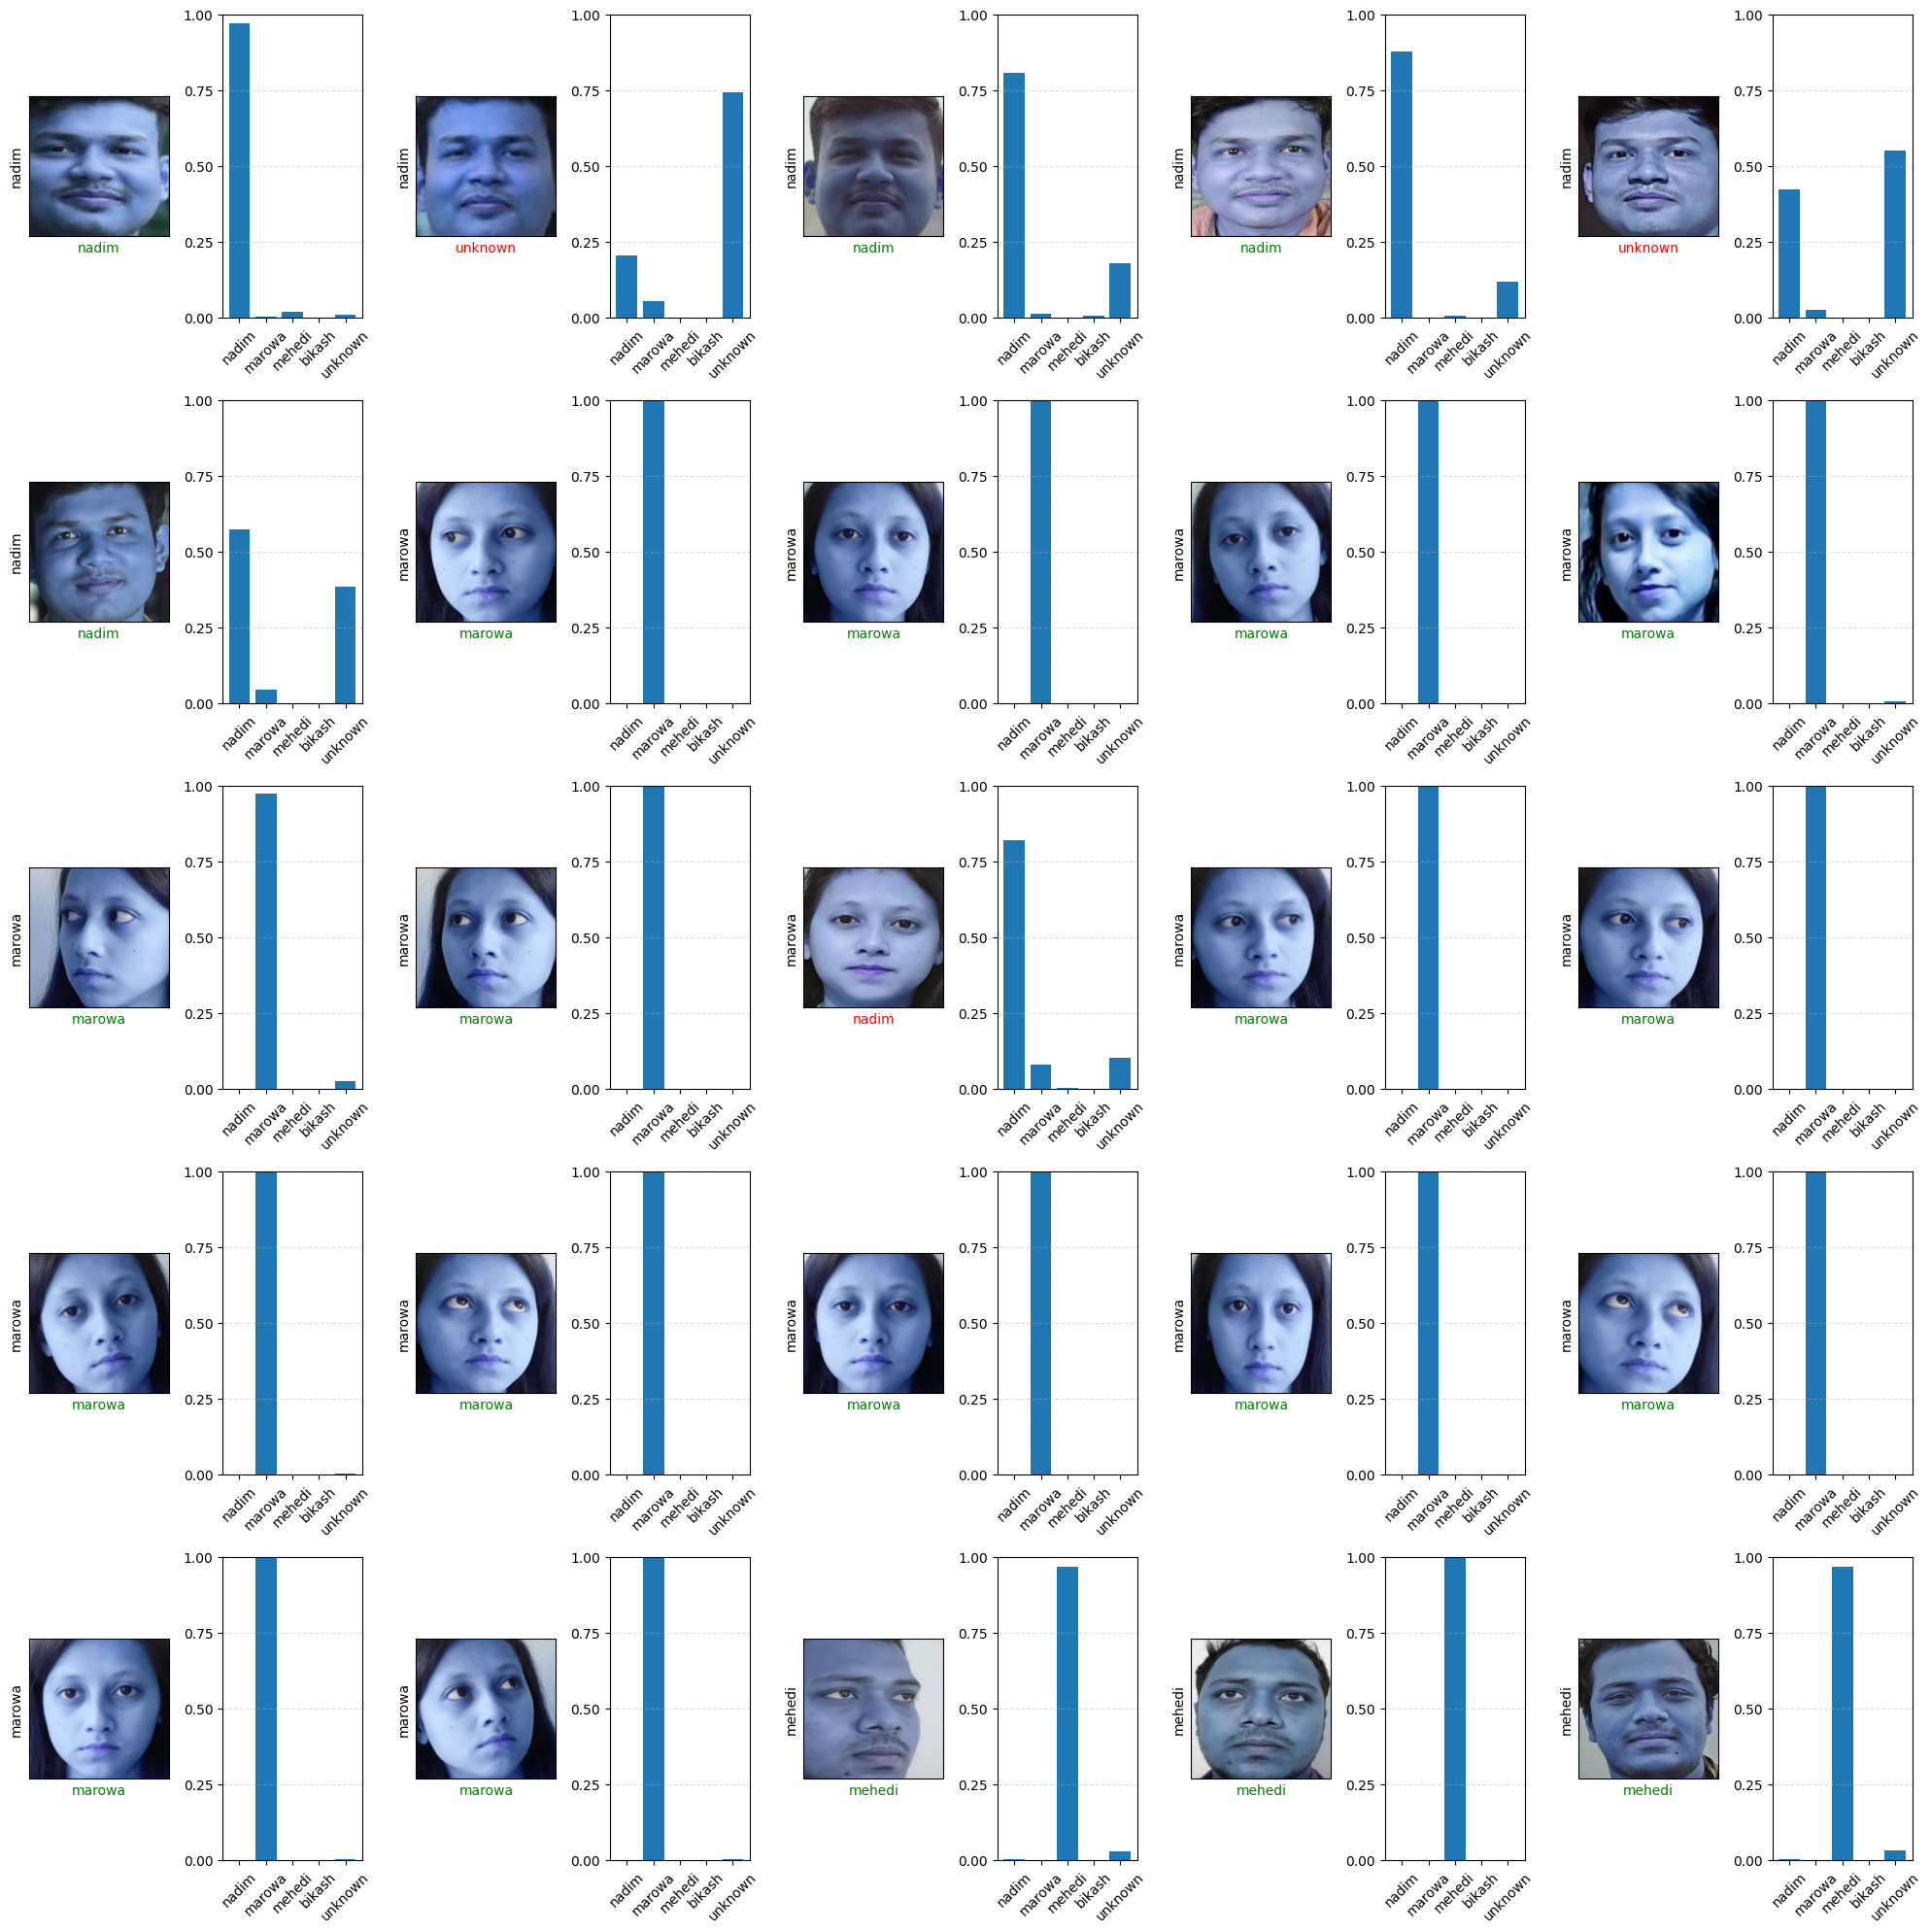

In [17]:
rows = 5
cols = 5
NUM_CLASSES = len(class_names)

plt.figure(figsize=(20,20))
for i in range(rows*cols):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test_normalize[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i]])
    if Y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(5), predictions[i])
    plt.yticks([])
    plt.xticks(range(NUM_CLASSES), class_names, rotation=45)
    plt.ylim([0,1])
    plt.yticks([0, 0.25, 0.5,0.75, 1.0])
    plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()